In [1]:
import torch
import torch.nn as nn


#Building from scratch

In [2]:
def conv_transpose(matrix, kernel, stride, padding):
    height, width = kernel.shape

    output_height = (matrix.shape[0] - 1) * stride + height - 2 * padding
    output_width = (matrix.shape[1] - 1) * stride + width - 2 * padding


    new_matrix = torch.zeros((output_height, output_width))


    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            new_matrix[i * stride: i * stride + height, j * stride: j * stride + width] += matrix[i, j] * kernel

    return new_matrix

This code demonestrates the operation of transposed convolution
where the output is a matrix of size

###[ (input size-1)*stride+kernel size- 2* padding  ]

as mentioned in the document.

Each pixel value in the output is multiplied by each pixel in the kernel ,
the resulting kernel is placed in new_matrix in the corresponding area .

In [3]:
matrix = torch.tensor([[0, 1], [2, 3]])
kernel = torch.tensor([[4, 1], [2, 3]])
stride = 1
padding = 0

result = conv_transpose(matrix, kernel, stride, padding)
print(result)


tensor([[ 0.,  4.,  1.],
        [ 8., 16.,  6.],
        [ 4., 12.,  9.]])


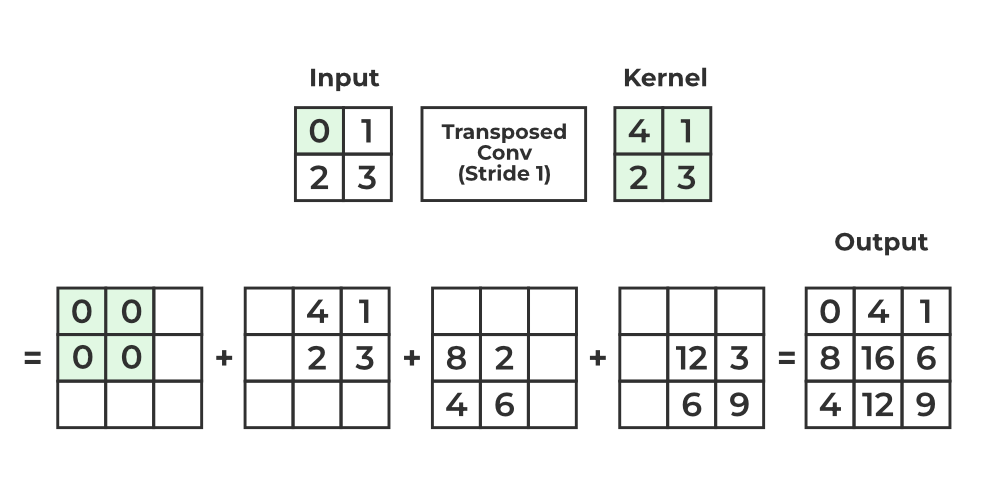

#Using built in ConvTranspose2d

Input Shape: The input tensor should be of shape
(
N
,
C
,
H
,
W
)


Kernel Shape: The kernel should be of shape
(
out_channels
,
in_channels
,
kernel_height
,
kernel_width
)


In [4]:
Input = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
Kernel = torch.tensor([[1.0, 4.0], [2.0, 3.0]])
Input = Input.reshape(1, 1, 2, 2)
Kernel = Kernel.reshape(1, 1, 2, 2)
Transpose = nn.ConvTranspose2d(in_channels=1,
							out_channels=1,
							kernel_size=2,
							stride=2,
							padding=0,
							bias=False)
Transpose.weight.data = Kernel
Transpose(Input)


tensor([[[[ 0.,  0.,  1.,  4.],
          [ 0.,  0.,  2.,  3.],
          [ 2.,  8.,  3., 12.],
          [ 4.,  6.,  6.,  9.]]]], grad_fn=<ConvolutionBackward0>)

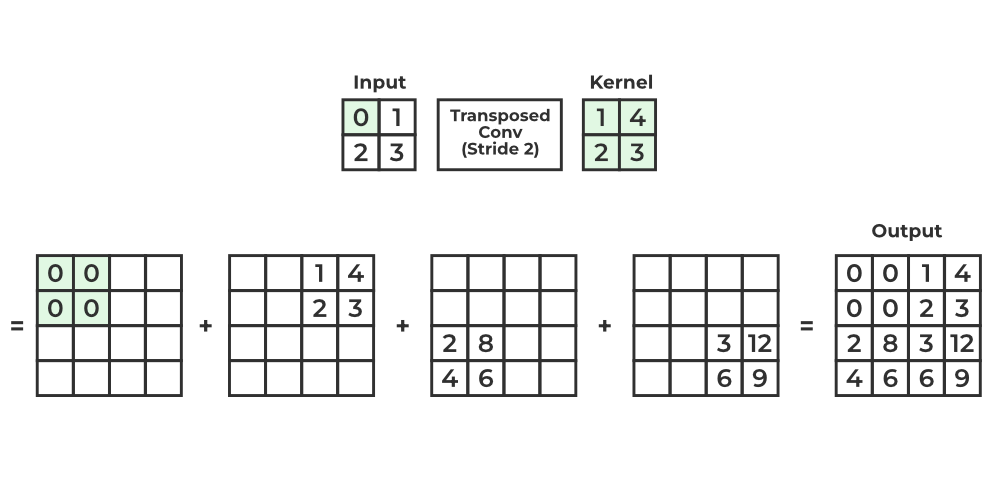